<a href="https://colab.research.google.com/github/Tahir7044/machine-learning/blob/master/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x
import tensorflow as tf

print(tf.version)

In [0]:
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [0]:
data=keras.datasets.fashion_mnist
(x_train,yrain),(x_test,y_test)=data.load_data()

In [0]:
y_train=yrain

In [6]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


9


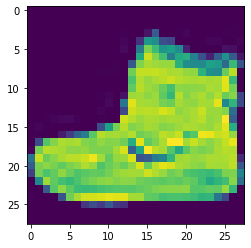

In [7]:
plt.imshow(x_train[0])
print(y_train[0])
plt.show()

In [0]:
print(y_train[:10])

In [0]:
class_name=['top','trouser','pullover','dress','coat','sandal','shirt','sneaker','bag','ankle boot']


In [0]:
plt.imshow(x_train[0])
print(class_name[y_train[0]])
plt.show()

In [0]:
x_train=x_train/255.0
x_test=x_test/255.0

model building

In [0]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Dropout

In [40]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_13 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_14 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_15 (Dense)             (None, 10)                330       
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=10,batch_size=32,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 5s 96us/sample - loss: 0.5306 - accuracy: 0.8140 - val_loss: 0.4375 - val_accuracy: 0.8421
Epoch 2/10
48000/48000 [==============================] - 4s 90us/sample - loss: 0.3850 - accuracy: 0.8609 - val_loss: 0.3876 - val_accuracy: 0.8615
Epoch 3/10
48000/48000 [==============================] - 4s 89us/sample - loss: 0.3478 - accuracy: 0.8724 - val_loss: 0.3670 - val_accuracy: 0.8636
Epoch 4/10
48000/48000 [==============================] - 4s 90us/sample - loss: 0.3228 - accuracy: 0.8810 - val_loss: 0.3414 - val_accuracy: 0.8767
Epoch 5/10
48000/48000 [==============================] - 4s 89us/sample - loss: 0.3021 - accuracy: 0.8880 - val_loss: 0.3469 - val_accuracy: 0.8733
Epoch 6/10
48000/48000 [==============================] - 4s 89us/sample - loss: 0.2891 - accuracy: 0.8924 - val_loss: 0.3395 - val_accuracy: 0.8792
Epoch 7/10
48000/48000 [==============================] 

In [38]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [0]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

since the accuracy curve is decreasing and loss value is increasing it means that the model is overfitting

In [15]:
test_loss,test_acc=model.evaluate(x_test,y_test)

10000/10000 [==============================] - 0s 46us/sample - loss: 0.3441 - accuracy: 0.8803


In [16]:
print(test_loss,test_acc)

0.3440566164970398 0.8803


In [43]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
y_pred=model.predict_classes(x_test)
accuracy_score(y_test,y_pred)

0.881

In [18]:
print(y_pred[:10],y_test[:10])

[9 2 1 1 6 1 4 6 5 7] [9 2 1 1 6 1 4 6 5 7]


In [0]:
pred=model.predict(x_test)

In [20]:
print(pred[0])
print(np.argmax(pred[0]))

[4.5052943e-06 5.3976918e-12 2.8542699e-08 7.3435213e-10 5.0965006e-09
 3.4899666e-04 9.0023599e-07 4.8711319e-03 2.4353521e-06 9.9477190e-01]
9


In [44]:
results=confusion_matrix(y_test,y_pred)
print(results)

[[848   2  10  21   3   0 110   0   6   0]
 [  5 966   2  21   3   0   2   0   1   0]
 [ 13   0 812  17  69   0  85   0   4   0]
 [ 28   4   6 919  11   0  28   0   4   0]
 [  1   0 133  58 742   0  64   0   2   0]
 [  0   0   0   0   0 952   0  32   1  15]
 [138   1  92  31  51   0 676   0  11   0]
 [  0   0   0   0   0   7   0 966   2  25]
 [  7   0   1   5   3   1   5   5 973   0]
 [  0   0   0   0   0   5   1  38   0 956]]


In [0]:
from mlxtend.plotting import plot_confusion_matrix as cn

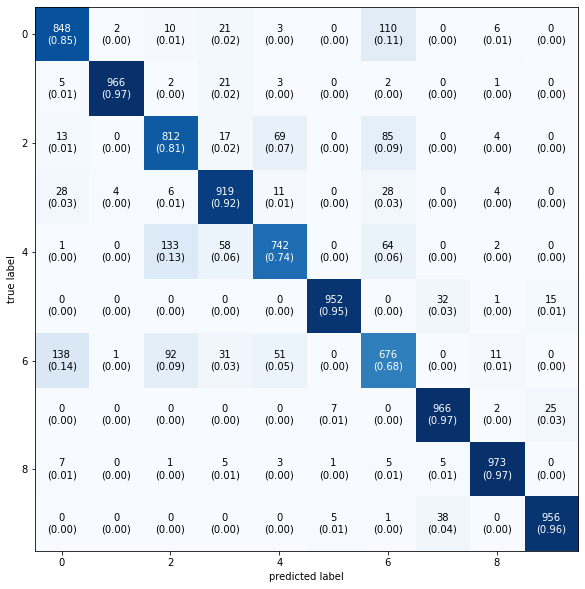

In [54]:
cn(conf_mat=results,figsize=(10,10),show_normed=True);